<a href="https://colab.research.google.com/github/nijoluca/MLProjects/blob/main/My_new_project_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'digit-recognizer:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3004%2F861823%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240404%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240404T003351Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da3c812d44d32e4c503017e68aa0a40881d06c56fdeba410b4666228e6593750ea8d67f20a19cca04b8e973210f7138399eaa9705fbd037f746035471ae87167ccca9eeae021aad702baaf4a68c58627375c5d3c9091f955e0b5995f0f70ce8c63c514f8b61a53ee0fc1441bb1f792c86dbf0e95a24d3193d323cbe0ccf2f46b5edc8749cdaa4524c87a097f584262e2263933167dfe7e5e55da202fc5323b564cb68ce13c39d4be86b956a11020663273db3a8ed604bfadedc5ea46b6887884c9a890186edb8e85aa1e2063914e8134843ad823ff9c133fa1c5d8d9c1db6ccb9e3a040801ae671e2ed942a206cd2279d610061617854dee8c6e0271d4d3b8521,diabetes:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3831944%2F6637689%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240404%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240404T003351Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Ddacfb31be251246cdef804cb21549ee10004ae4f9911e9250acedf95f9727f5ce230a36989fda07f975189fd789091647c19faac6cfdfe9f7a9595ce3b2dd6a0cb241da126ee9912141d65fc15878d0d6194a4820bc2d894006c9a5f8bb5087f0cda916efd0317758248b0c1cf6b5ca68e265dbea2780b774173f1ac32501233104c7dd9a2cb4ab60bb2ccfa12b5f3e88b2e14b5acbd776403bea07398a5be9b316d1ab0b24a6149db838c7772a49f04377b8f33cf75777f44ee90999b8c7baa7268739921e4a69270063764665b9051d76208ca4550ec1cb399165d027bab49c781ccec0f0db5932406c5bad7db50da44cafa3dab3ad3cdb7e17fe30384c6b6,diabetes-intermediate-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4705451%2F7992610%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240404%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240404T003351Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3fd1898f4f43008b3eebb0effa1d3b4f77a7a041912175fe79769b20f9e7715d604848c24d154f5b33a76aca6b9482004d40db56e5cd67855d39c053d183d16a49fcc0799b11d713c590245f2b2adf157ad75b46a88a3de45502cdb606beb337907c31fd125030570d912595028e21405b4c5a400c9eb40a31def22ef3718785c60070960f2b1e08ffc7262c53b33684bde1c9503f039d062bc9235706e23e30acb914f0af0402e9af1c9c4e5b424d7fec05ae7d39ee86d92a0801c517d0c2e241b830b684581e4f7b80f0fe1b84a51182130f09e1fafe7529ff1783124dd5568f282e77e39e1e1b1b07d8a88f45e6df7a10e5ae1f5e0475619f024f2d6e7c2e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 16054568 bytes downloaded
Downloaded and uncompressed: digit-recognizer
[==================================================] 11477 bytes downloaded
Downloaded and uncompressed: diabetes
[==================================================] 9128 bytes downloaded
Downloaded and uncompressed: diabetes-intermediate-dataset
Data source import complete.


In [ ]:
#https://www.kaggle.com/code/aaronfriasr/mnist-simple-cnn-keras-accuracy-0-99-top-1

In [3]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Lambda
from keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [6]:
import os
os.listdir('../input/digit-recognizer')

['train.csv', 'sample_submission.csv', 'test.csv']

In [7]:
train=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
sub=pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
print("Data is Ready!")

Data is Ready!


In [8]:
print(f"The training data set is  of {train.shape}\n The testing data set is of {test.shape}")

The training data set is  of (42000, 785)
 The testing data set is of (28000, 784)


In [9]:
x=train.drop(columns=['label']).values
y=train['label'].values



In [10]:
x=x/255

In [11]:
x=x.reshape(-1,28,28,1)
print(x.shape)

(42000, 28, 28, 1)


In [12]:
y=to_categorical(y)
print(y)
print(f"{y.shape}")

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(42000, 10)


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(37800, 28, 28, 1) (4200, 28, 28, 1) (37800, 10) (4200, 10)


In [14]:
print(x_train.shape[0])

37800


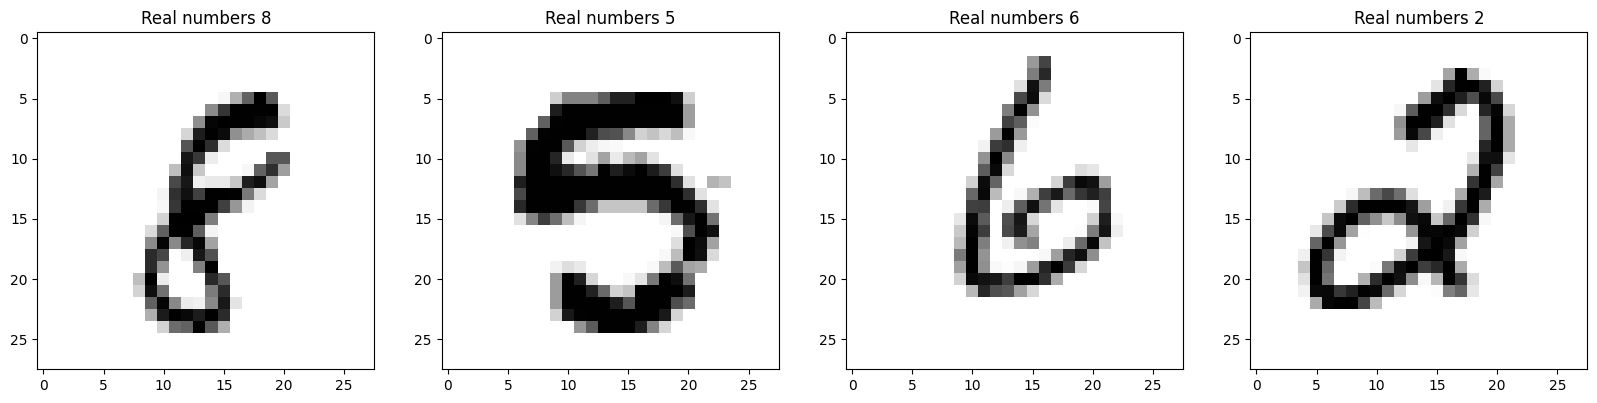

In [15]:
x_train__=x_train.reshape(x_train.shape[0],28,28)
fig,axis=plt.subplots(1,4,figsize=(20,10))
for i,ax in enumerate(axis.flat):
    ax.imshow(x_train__[i],cmap='binary')
    digit=y_train[i].argmax()
    ax.set(title=f"Real numbers {digit}")

In [16]:
mean=np.mean(x_train)
std=np.std(x_train)

def standardize(x):
  return (x-mean)/std

In [17]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation="relu"))

model.add(Dense(10,activation="relu"))

model.compile(loss="catergorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 12, 12, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1